In [1]:
tissues_with_atac = ['CHO','Brain','Liver','Lung','Kidney','Spleen','BMDMwt','BMDM1hKLA']

In [2]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation=doc['annotation']


In [3]:
tss_annotation = doc['tss_annotation']

In [4]:
import os
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm
### notebook specific configuration ###
from os.path import basename
#mpl.style.use('ggplot')
mpl.style.use('fivethirtyeight')
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

from Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 15)


In [5]:
from ATAC_helper import *

In [6]:
import create_output

## 1. Using final bed file vs the refseq genes CHO peaks and ATAC

In [7]:
cmd = "cp Results/output/TSS1.exp.bed Results/Figures/SuppFigure4/Data/"
!{cmd}

In [8]:
cmd = "cp Results/output/TSS1.ref.bed Results/Figures/SuppFigure4/Data/"
!{cmd}

In [ ]:
bed_df = pd.read_csv("Results/Figures/SuppFigure4/Data/TSS1.exp.bed",sep="\t",header=None)
bed_df[3] = bed_df.index #bed_df[3].str.replace("@","")
bed_df.to_csv("Results/Figures/SuppFigure4/Data/TSS1.exp.bed_mod",sep="\t",header=None,index=False)
bed_df.head()

In [ ]:
cmd = "computeMatrix reference-point -S /data/isshamie/TSS/1015_Processed/CHO/ATAC/out/signal/macs2/pooled_rep/CHO_ATAC1.trim.nodup.tn5_CHO_ATAC3.trim.nodup.tn5.pf.fc.signal.bigwig -R Results/peak_groups/CHO/confident_promoters.bed -a 1000 -b 1000 -out Results/Figures/SuppFigure4/exp_all --numberOfProcessors 6"
!{cmd}

In [7]:
cmd = "computeMatrix reference-point -S /data/isshamie/TSS/1015_Processed/CHO/ATAC/out/signal/macs2/pooled_rep/CHO_ATAC1.trim.nodup.tn5_CHO_ATAC3.trim.nodup.tn5.pf.fc.signal.bigwig -R Results/Figures/SuppFigure4/Data/TSS1.exp.bed -a 1000 -b 1000 -out Results/Figures/SuppFigure4/exp_all --numberOfProcessors 6"
!{cmd}

Skipping p1@IGHV3-6_gene_3015_asmbl_8943, due to being absent in the computeMatrix output.
Skipping p1@APOE_gene_5058_asmbl_14749, due to being absent in the computeMatrix output.
Skipping p1@IGHV3-74_gene_7002_asmbl_20945, due to being absent in the computeMatrix output.
Skipping p1@GM5629_gene_21760_asmbl_61263, due to being absent in the computeMatrix output.
Skipping p2@GM5629_gene_21760_asmbl_61263, due to being absent in the computeMatrix output.
Skipping p1@IGHV3-6_gene_21761_asmbl_61264, due to being absent in the computeMatrix output.
Skipping p2@IGHV3-6_gene_21761_asmbl_61264, due to being absent in the computeMatrix output.


## 1.1 
## +/-1 1kb CHO experimental and refseq not in experimental 

computeMatrix reference-point -S /data/isshamie/TSS/1015_Processed/CHO/ATAC/out/signal/macs2/pooled_rep/CHO_ATAC1.trim.nodup.tn5_CHO_ATAC3.trim.nodup.tn5.pf.fc.signal.bigwig -R Results/Figures/SuppFigure4/Data/TSS1.exp.bed -a 1000 -b 1000 -out Results/Figures/SuppFigure4/exp_all --numberOfProcessors 6 
plotHeatmap     -m Results/Figures/SuppFigure4/exp_all     -out Results/Figures/SuppFigure4/exp_all.png      --heatmapHeight 15       --refPointLabel TSS.center      --regionsLabel TSS      --plotTitle 'ATAC signal' 


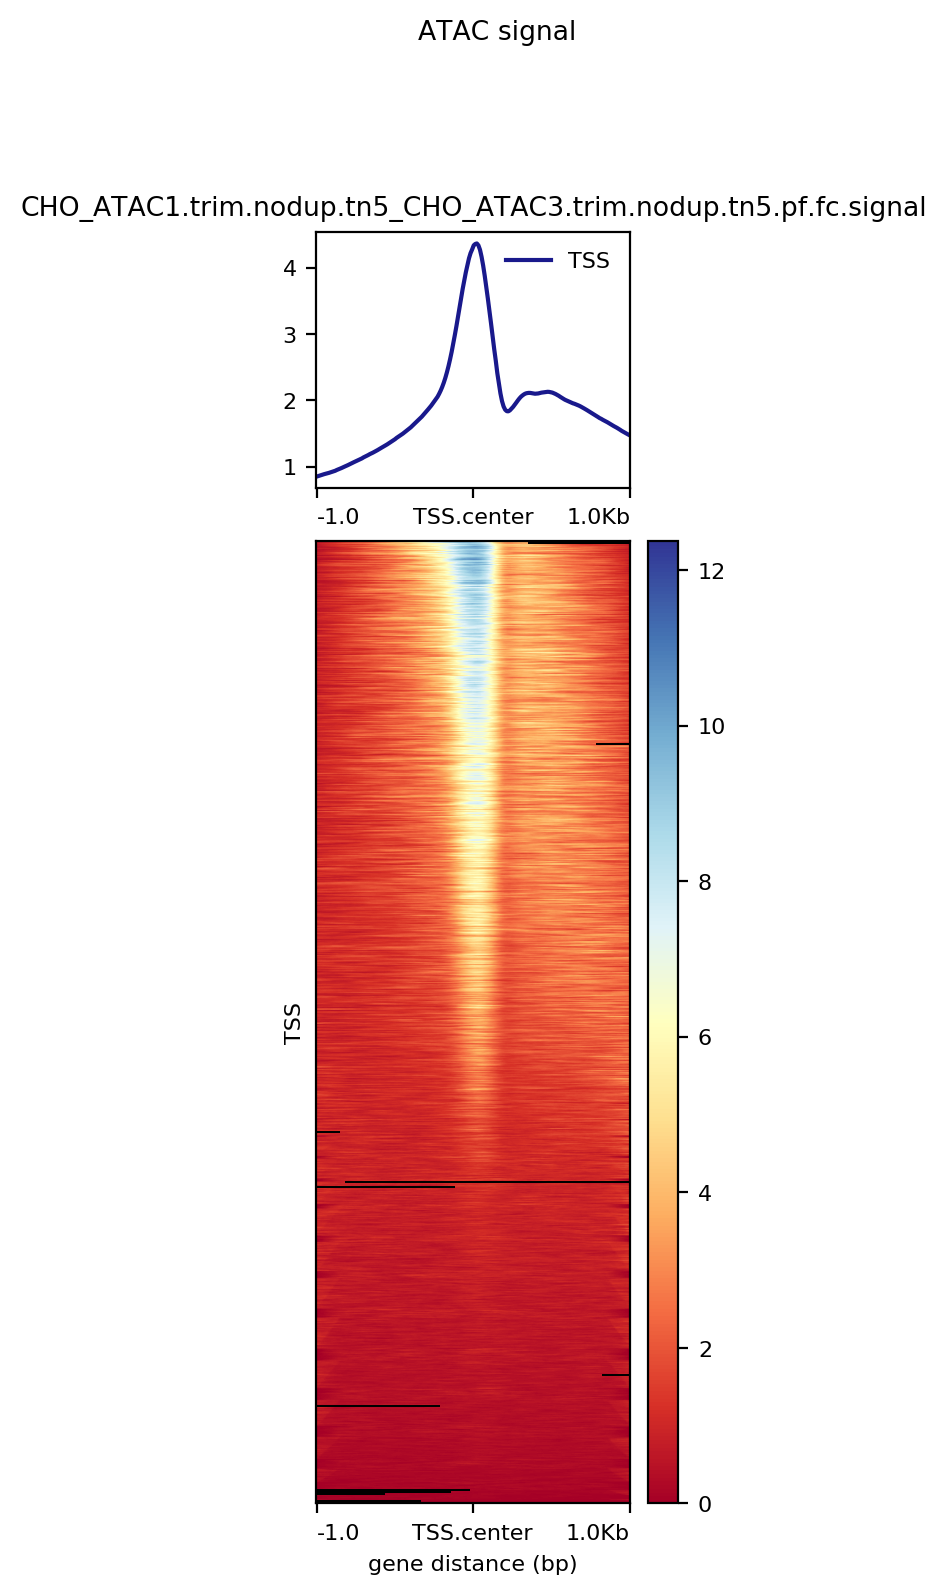

In [9]:
outfile = "Results/Figures/SuppFigure4/exp_all"
tss_bed = "Results/Figures/SuppFigure4/Data/TSS1.exp.bed" 
t = "CHO"

bigwig = glob.glob(os.path.join(data_folder,t, 'ATAC/out/signal/macs2/pooled_rep/*.fc.signal.bigwig'))[0]

run_heatmap(tss_bed, bigwig, outfile, dist=1000, numProc=6, dispImage=True)

computeMatrix reference-point -S /data/isshamie/TSS/1015_Processed/CHO/ATAC/out/signal/macs2/pooled_rep/CHO_ATAC1.trim.nodup.tn5_CHO_ATAC3.trim.nodup.tn5.pf.fc.signal.bigwig -R Results/Figures/SuppFigure4/Data/TSS1.ref.bed -a 1000 -b 1000 -out Results/Figures/SuppFigure4/ref_nonexp --numberOfProcessors 6 
plotHeatmap     -m Results/Figures/SuppFigure4/ref_nonexp     -out Results/Figures/SuppFigure4/ref_nonexp.png      --heatmapHeight 15       --refPointLabel TSS.center      --regionsLabel TSS      --plotTitle 'ATAC signal' 


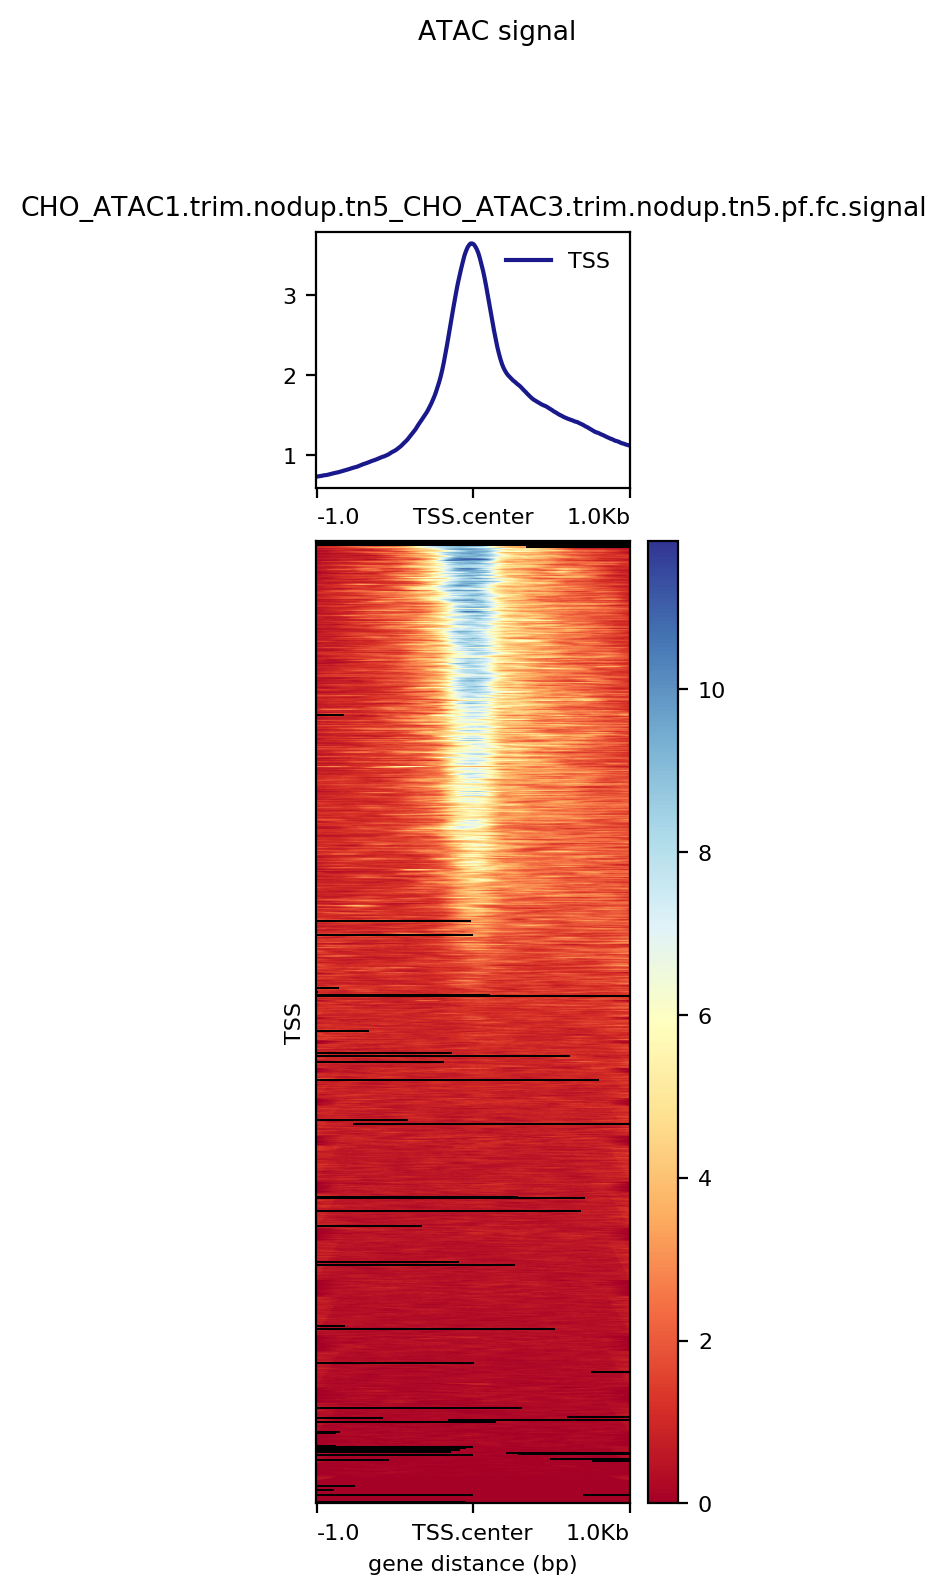

In [10]:
outfile = "Results/Figures/SuppFigure4/ref_nonexp"
tss_bed = "Results/Figures/SuppFigure4/Data/TSS1.ref.bed" 
t = "CHO"

bigwig = glob.glob(os.path.join(data_folder,t, 'ATAC/out/signal/macs2/pooled_rep/*.fc.signal.bigwig'))[0]

run_heatmap(tss_bed, bigwig, outfile, dist=1000, numProc=6, dispImage=True)

## Peaks seen only in CHO

In [11]:
meta_df = pd.read_csv("Results/output/TSS1.meta",sep="\t",na_filter=None,index_col=0)
bed_df = pd.read_csv("Results/output/TSS1.bed",sep="\t",header=None)



In [12]:
bed_df.head()

,0,1,2,3,4,5
0,picr_0,175,177,p0@SERHL_gene_1_2_asmbl_2,0.00000,+
1,picr_0,18148,18150,p0@SERHL_gene_1_4_asmbl_11,0.00000,+
2,picr_0,20786,20788,p0@SERHL_gene_1_4_asmbl_12,0.00000,+
3,picr_0,20916,21066,p1@SERHL_gene_1_4_asmbl_14,2.05576,+
4,picr_0,22503,22505,p0@SERHL_gene_1_4_asmbl_15,0.00000,+


In [13]:
cho_meta_df = meta_df[meta_df["Tissues"].str.contains("CHO")]
cho_bed_df = bed_df[bed_df[3].isin(cho_meta_df.index)]

print(cho_bed_df.shape)

print(cho_meta_df.shape)


cho_bed_df.to_csv("Results/Figures/SuppFigure4/Data/TSS1.CHO.bed",sep="\t",header=None,index=None)

(19181, 6)
(19181, 9)


computeMatrix reference-point -S /data/isshamie/TSS/1015_Processed/CHO/ATAC/out/signal/macs2/pooled_rep/CHO_ATAC1.trim.nodup.tn5_CHO_ATAC3.trim.nodup.tn5.pf.fc.signal.bigwig -R Results/Figures/SuppFigure4/Data/TSS1.CHO.bed -a 1000 -b 1000 -out Results/Figures/SuppFigure4/TSS1.CHO --numberOfProcessors 6 
plotHeatmap     -m Results/Figures/SuppFigure4/TSS1.CHO     -out Results/Figures/SuppFigure4/TSS1.CHO.png      --heatmapHeight 15       --refPointLabel TSS.center      --regionsLabel TSS      --plotTitle 'ATAC signal' 


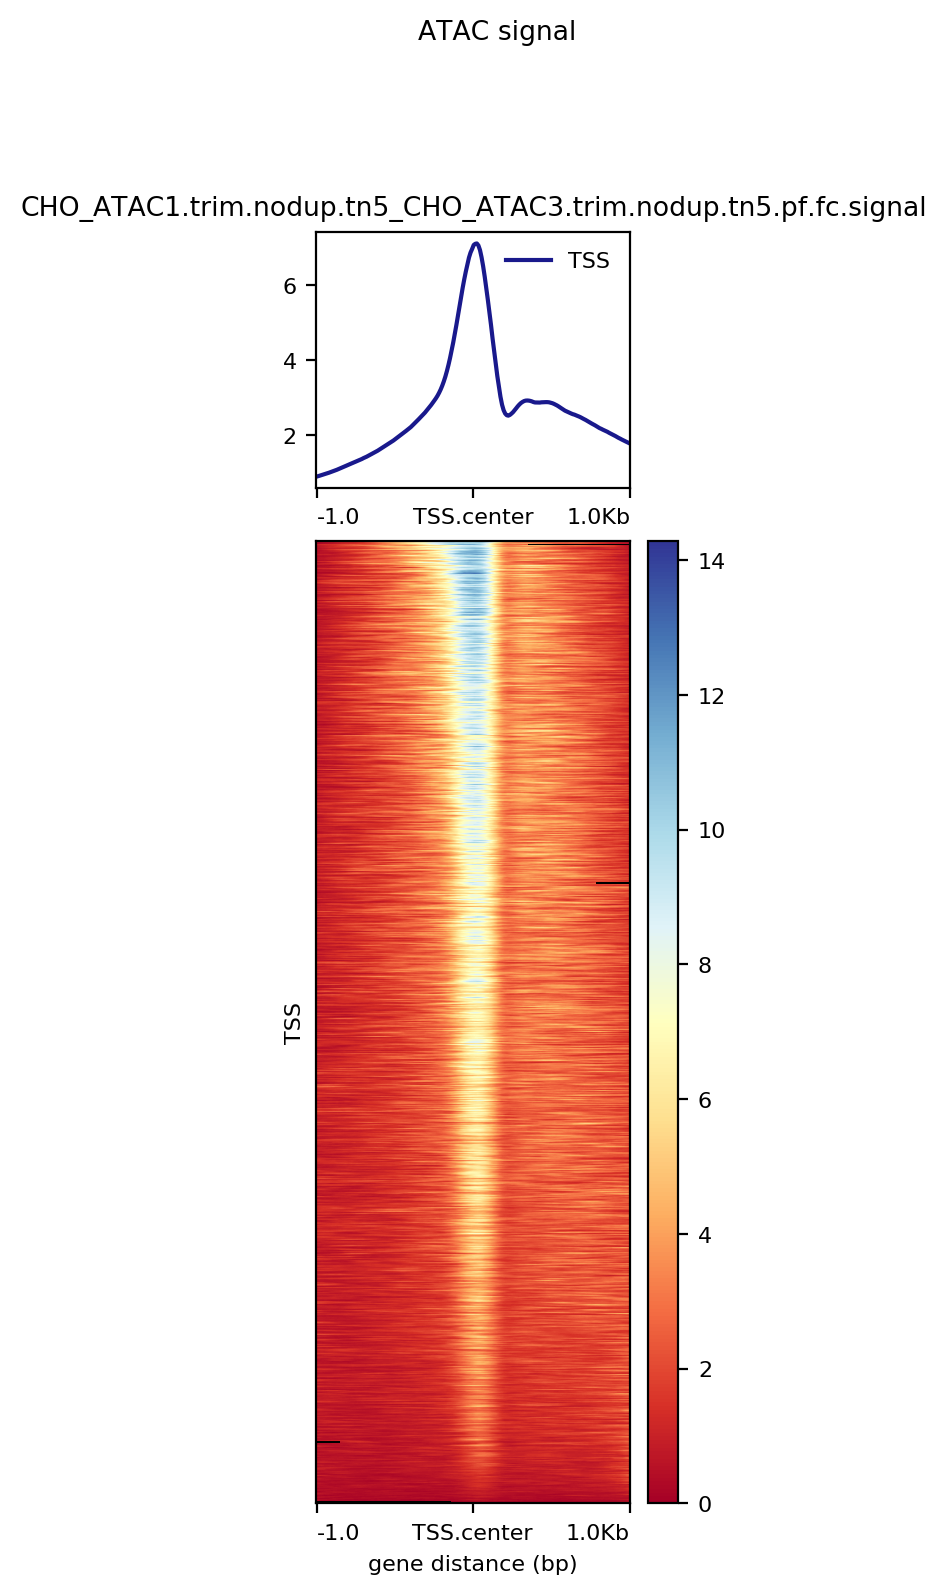

In [14]:
outfile = "Results/Figures/SuppFigure4/TSS1.CHO"
tss_bed = "Results/Figures/SuppFigure4/Data/TSS1.CHO.bed" 
t = "CHO"

bigwig = glob.glob(os.path.join(data_folder,t, 'ATAC/out/signal/macs2/pooled_rep/*.fc.signal.bigwig'))[0]

run_heatmap(tss_bed, bigwig, outfile, dist=1000, numProc=6, dispImage=True)

In [ ]:
cho_meta_df = meta_df[meta_df["Tissues"].str.contains("CHO")]
print("CHO ATAC", (cho_meta_df["CHO ATAC Region"] == "").sum())
print("has any ATAC:",cho_meta_df["has ATAC"].sum())

('CHO ATAC', 9949)
('has any ATAC:', 8078)


## Tissues with ATAC

## 2. Create for bed for each tissue with an atac 

In [ ]:
for t in tissues_with_atac:
    print(t)
#     if t == "BMDM1hKLA":
#         continue
    if os.path.exists(os.path.join(data_folder,t, 'ATAC/out/signal/macs2/pooled_rep/')):
        bigwig = glob.glob(os.path.join(data_folder,t, 'ATAC/out/signal/macs2/pooled_rep/*.fc.signal.bigwig'))[0]
    else:
        bigwig = glob.glob(os.path.join(data_folder,t, 'ATAC/out/signal/macs2/rep1/*.fc.signal.bigwig'))[0]

    curr_meta_df = meta_df[meta_df["Tissues"].str.contains(t)]
    curr_bed_df = bed_df[bed_df[3].isin(curr_meta_df.index)]
    
    print(curr_bed_df.shape)
    print(curr_meta_df.shape)

    curr_tss_bed = "Results/Figures/SuppFigure4/Data/TSS1.%s.bed" % (t)
    curr_bed_df.to_csv(curr_tss_bed,sep="\t",header=None,index=None)
    
    curr_tss_meta = "Results/Figures/SuppFigure4/Data/TSS1.%s.meta" % (t)
    curr_meta_df.to_csv(curr_tss_meta,sep="\t")
    curr_tss_out = curr_tss_bed.strip(".bed")
    print(curr_tss_bed,curr_tss_out)
    c = run_heatmap(curr_tss_bed, bigwig, curr_tss_out, dist=1000, numProc=6, dispImage=True)
    

    ## Create the refseq version
    
    save_f = curr_tss_bed.strip(".bed") + "_refseq_centered.bed"
    _ = create_output.exp_bed_to_refseq(curr_tss_bed, curr_tss_meta, save_f = save_f,
                  refseq_f="/data/isshamie/genome/picr_final/mRNA_final.peak")
    
    curr_tss_out = save_f.strip(".bed")
    c = run_heatmap(save_f, bigwig, curr_tss_out, dist=1000, numProc=6, dispImage=True)
    

CHO
(19181, 6)
(19181, 9)
('Results/Figures/SuppFigure4/Data/TSS1.CHO.bed', 'Results/Figures/SuppFigure4/Data/TSS1.CHO')
computeMatrix reference-point -S /data/isshamie/TSS/1015_Processed/CHO/ATAC/out/signal/macs2/pooled_rep/CHO_ATAC1.trim.nodup.tn5_CHO_ATAC3.trim.nodup.tn5.pf.fc.signal.bigwig -R Results/Figures/SuppFigure4/Data/TSS1.CHO.bed -a 1000 -b 1000 -out Results/Figures/SuppFigure4/Data/TSS1.CHO --numberOfProcessors 6 
plotHeatmap     -m Results/Figures/SuppFigure4/Data/TSS1.CHO     -out Results/Figures/SuppFigure4/Data/TSS1.CHO.png      --heatmapHeight 15       --refPointLabel TSS.center      --regionsLabel TSS      --plotTitle 'ATAC signal' 
computeMatrix reference-point -S /data/isshamie/TSS/1015_Processed/CHO/ATAC/out/signal/macs2/pooled_rep/CHO_ATAC1.trim.nodup.tn5_CHO_ATAC3.trim.nodup.tn5.pf.fc.signal.bigwig -R Results/Figures/SuppFigure4/Data/TSS1.CHO_refseq_centered.bed -a 1000 -b 1000 -out Results/Figures/SuppFigure4/Data/TSS1.CHO_refseq_center --numberOfProcessors 6 


## 200 bps

In [ ]:
dist = 250

for t in tissues_with_atac:
    print(t)
    if t == "BMDM1hKLA":
        continue
    if os.path.exists(os.path.join(data_folder,t, 'ATAC/out/signal/macs2/pooled_rep/')):
        bigwig = glob.glob(os.path.join(data_folder,t, 'ATAC/out/signal/macs2/pooled_rep/*.fc.signal.bigwig'))[0]
    else:
        bigwig = glob.glob(os.path.join(data_folder,t, 'ATAC/out/signal/macs2/rep1/*.fc.signal.bigwig'))[0]

    curr_meta_df = meta_df[meta_df["Tissues"].str.contains(t)]
    curr_bed_df = bed_df[bed_df[3].isin(curr_meta_df.index)]
    
    print(curr_bed_df.shape)
    print(curr_meta_df.shape)

    curr_tss_bed = "Results/Figures/SuppFigure4/Data/TSS1.%s.bed" % (t)
    curr_bed_df.to_csv(curr_tss_bed,sep="\t",header=None,index=None)
    
    curr_tss_meta = "Results/Figures/SuppFigure4/Data/TSS1.%s.meta" % (t)
    curr_meta_df.to_csv(curr_tss_meta,sep="\t")
    curr_tss_out = curr_tss_bed.strip(".bed") + "_" + str(dist)
    print(curr_tss_bed,curr_tss_out)
    c = run_heatmap(curr_tss_bed, bigwig, curr_tss_out, dist=dist, numProc=6, dispImage=True)
    

    ## Create the refseq version
    save_f = curr_tss_bed.strip(".bed") + "_refseq_centered.bed"
    curr_tss_out = save_f.strip(".bed") + "_" + str(dist)
    c = run_heatmap(save_f, bigwig, curr_tss_out, dist=dist, numProc=6, dispImage=True)
    

## Homer

In [ ]:
dist = 250
t = "CHO"
print(t)
bigwig = "/data/isshamie/TSS/1015_Processed/CHO/ATAC/Homer_Process/tags/CHO_ATAC1.bigwig"

curr_meta_df = meta_df[meta_df["Tissues"].str.contains(t)]
curr_bed_df = bed_df[bed_df[3].isin(curr_meta_df.index)]

curr_tss_bed = "Results/Figures/SuppFigure4/Data/TSS1.%s.bed" % (t)
curr_tss_meta = "Results/Figures/SuppFigure4/Data/TSS1.%s.meta" % (t)
curr_tss_out = curr_tss_bed.strip(".bed") + "_" + str(dist) + '_Homer'
print(curr_tss_bed,curr_tss_out)

c = run_heatmap(curr_tss_bed, bigwig, curr_tss_out, dist=dist, numProc=6, dispImage=True)


## Create the refseq version
save_f = curr_tss_bed.strip(".bed") + "_refseq_centered.bed"
curr_tss_out = save_f.strip(".bed") + "_" + str(dist) + "_Homer"
c = run_heatmap(save_f, bigwig, curr_tss_out, dist=dist, numProc=6, dispImage=True)


In [ ]:
dist = 1000
t = "CHO"
print(t)
bigwig = "/data/isshamie/TSS/1015_Processed/CHO/ATAC/Homer_Process/tags/CHO_ATAC1.bigwig"

curr_meta_df = meta_df[meta_df["Tissues"].str.contains(t)]
curr_bed_df = bed_df[bed_df[3].isin(curr_meta_df.index)]

curr_tss_bed = "Results/Figures/SuppFigure4/Data/TSS1.%s.bed" % (t)
curr_tss_meta = "Results/Figures/SuppFigure4/Data/TSS1.%s.meta" % (t)
curr_tss_out = curr_tss_bed.strip(".bed") + "_" + str(dist) + '_Homer'
print(curr_tss_bed,curr_tss_out)

c = run_heatmap(curr_tss_bed, bigwig, curr_tss_out, dist=dist, numProc=6, dispImage=True)


## Create the refseq version
save_f = curr_tss_bed.strip(".bed") + "_refseq_centered.bed"
curr_tss_out = save_f.strip(".bed") + "_" + str(dist) + "_Homer"
c = run_heatmap(save_f, bigwig, curr_tss_out, dist=dist, numProc=6, dispImage=True)


## Only peak1 bed file

In [ ]:
dist = 1000
t = "CHO"
print(t)
bigwig = "/data/isshamie/TSS/1015_Processed/CHO/ATAC/Homer_Process/tags/CHO_ATAC1.bigwig"

curr_meta_df = meta_df[meta_df["Tissues"].str.contains(t)]
curr_meta_df = curr_meta_df[curr_meta_df.index.str.contains("p1")]
curr_bed_df = bed_df[bed_df[3].isin(curr_meta_df.index)]

curr_tss_bed = "Results/Figures/SuppFigure4/Data/TSS1.%s_p1.bed" % (t)
curr_bed_df.to_csv(curr_tss_bed,sep="\t",header=None,index=None)

curr_tss_meta = "Results/Figures/SuppFigure4/Data/TSS1.%s_p1.meta" % (t)
curr_meta_df.to_csv(curr_tss_meta,sep="\t")
curr_tss_out = curr_tss_bed.strip(".bed")
print(curr_tss_bed,curr_tss_out)
c = run_heatmap(curr_tss_bed, bigwig, curr_tss_out, dist=1000, numProc=6, dispImage=True)


## Create the refseq version

save_f = curr_tss_bed.strip(".bed") + "_refseq_centered_p1.bed"
_ = create_output.exp_bed_to_refseq(curr_tss_bed, curr_tss_meta, save_f = save_f,
              refseq_f="/data/isshamie/genome/picr_final/mRNA_final.peak")

curr_tss_out = save_f.strip(".bed") + "_" + str(dist) + "_Homer_p1"
c = run_heatmap(save_f, bigwig, curr_tss_out, dist=dist, numProc=6, dispImage=True)


In [ ]:
curr_tss_out = save_f.strip(".bed") + "_" + str(dist) + "_Homer_p1"
c = run_heatmap(save_f, bigwig, curr_tss_out, dist=dist, numProc=6, dispImage=True)


## 3. Leftmost peak vs others

In [ ]:
cols = ["Chr","Start","End","ID","Stat","Strand"]
bed_df.columns = cols
out_tss_df = pd.concat((bed_df.set_index("ID"),meta_df),axis=1)

In [ ]:
def return_most_downstream_peak(tss_df):
    ## Need to separate pos and neg strand b/c want leftmost
    out_tss = tss_df.sort_values(["Chr","Strand"])
    out_tss_pos = out_tss_df[out_tss_df["Strand"] == "+"]
    out_tss_neg = out_tss_df[out_tss_df["Strand"] == "-"]
    out_tss_pos = out_tss_pos.sort_values(["Start","End"],ascending=False)
    out_tss_pos = out_tss_pos[~out_tss_pos["Transcript"].duplicated()]
    out_tss_neg = out_tss_neg.sort_values(["Start","End"])

    out_tss = pd.concat((out_tss_pos,out_tss_neg),axis=0)
    out_tss = out_tss.sort_values(["Chr","Strand","Start","End"])
    out_tss = out_tss[~out_tss.sort_values(["Chr","Strand","Start","End"])["Transcript"].duplicated()]

    out_tss = out_tss.sort_values(["Chr","Start","End","Strand"])
    return out_tss

In [ ]:
dist = 1000
t = "CHO"
print(t)
bigwig = "/data/isshamie/TSS/1015_Processed/CHO/ATAC/Homer_Process/tags/CHO_ATAC1.bigwig"

curr_meta_df = meta_df[meta_df["Tissues"].str.contains(t)]
curr_bed_df = bed_df[bed_df["ID"].isin(curr_meta_df.index)]

# Merge the two and find the most downstream peaks of a transcript
out_tss_df = pd.concat((curr_bed_df.set_index("ID"),curr_meta_df),axis=1)
out_tss_df = return_most_downstream_peak(out_tss_df)

curr_bed_df = out_tss_df[["Chr","Start","End","ID","Stat","Strand"]]
curr_tss_bed = "Results/Figures/SuppFigure4/Data/TSS1.%s_downstream.bed" % (t)
curr_bed_df.to_csv(curr_tss_bed,sep="\t",header=None,index=None)

# Make the full meta 
curr_meta_df = out_tss_df
curr_tss_meta = "Results/Figures/SuppFigure4/Data/TSS1.%s_downstream.meta" % (t)
curr_meta_df.to_csv(curr_tss_meta,sep="\t")
curr_tss_out = curr_tss_bed.strip(".bed")
print(curr_tss_bed,curr_tss_out)
c = run_heatmap(curr_tss_bed, bigwig, curr_tss_out, dist=1000, numProc=6, dispImage=True)


## Create the refseq version

save_f = curr_tss_bed.strip(".bed") + "_refseq_centered_downstream.bed"
_ = create_output.exp_bed_to_refseq(curr_tss_bed, curr_tss_meta, save_f = save_f,
              refseq_f="/data/isshamie/genome/picr_final/mRNA_final.peak")

curr_tss_out = save_f.strip(".bed") + "_" + str(dist) + "_Homer_downstream"
c = run_heatmap(save_f, bigwig, curr_tss_out, dist=dist, numProc=6, dispImage=True)


## Panel B
## silenced genes in refseq

## 3. Peak 1 vs others